In [1]:
import numpy as np
from scipy import io
import matplotlib.pyplot as plt
import cv2

In [3]:
#load dataset
dataset = io.loadmat('./dataset/Data_hoda_full.mat')

In [4]:
#test and training set
X_train_orginal = np.squeeze(dataset['Data'][:1000])
y_train = np.squeeze(dataset['labels'][:1000])
X_test_original = np.squeeze(dataset['Data'][1000:1200])
y_test = np.squeeze(dataset['labels'][1000:1200])

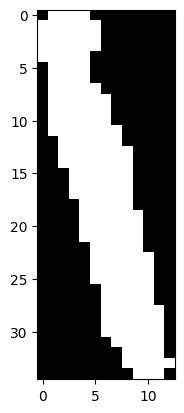

In [5]:
plt.imshow(X_train_orginal[999], cmap='gray')
plt.show()

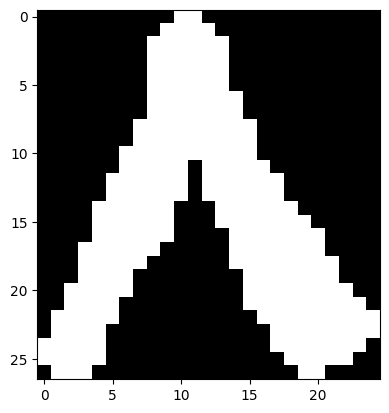

Label 70th image is: 8


In [6]:
i=70
image = X_train_orginal[i]
label = y_train[i]
plt.imshow(image, cmap='gray')
plt.show()
print("Label {}th image is: {}".format(i, label))

In [7]:
#resize
X_train_5by5 = [cv2.resize(img, dsize=(5, 5)) for img in X_train_orginal]
X_test_5by_5 = [cv2.resize(img, dsize=(5, 5)) for img in X_test_original]

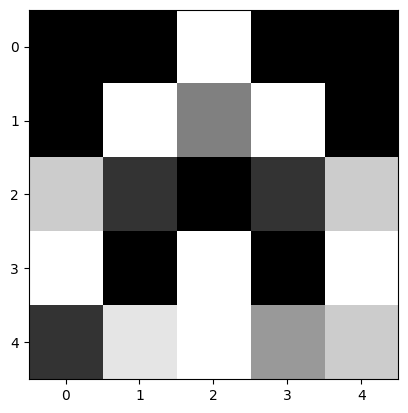

In [8]:
image = X_train_5by5[1]
plt.imshow(image, cmap='gray')
plt.show()

In [9]:
#reshape
X_train = np.reshape(X_train_5by5, [-1,25])
X_test = np.reshape(X_test_5by_5, [-1,25])

In [10]:
X_train.shape

(1000, 25)

In [11]:
X_test.shape

(200, 25)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [13]:
k_values = range(1, 11)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'Accuracy for k={k}: {accuracy:.4f}')

Accuracy for k=1: 0.9100
Accuracy for k=2: 0.9150
Accuracy for k=3: 0.9600
Accuracy for k=4: 0.9450
Accuracy for k=5: 0.9450
Accuracy for k=6: 0.9450
Accuracy for k=7: 0.9350
Accuracy for k=8: 0.9200
Accuracy for k=9: 0.9150
Accuracy for k=10: 0.9150


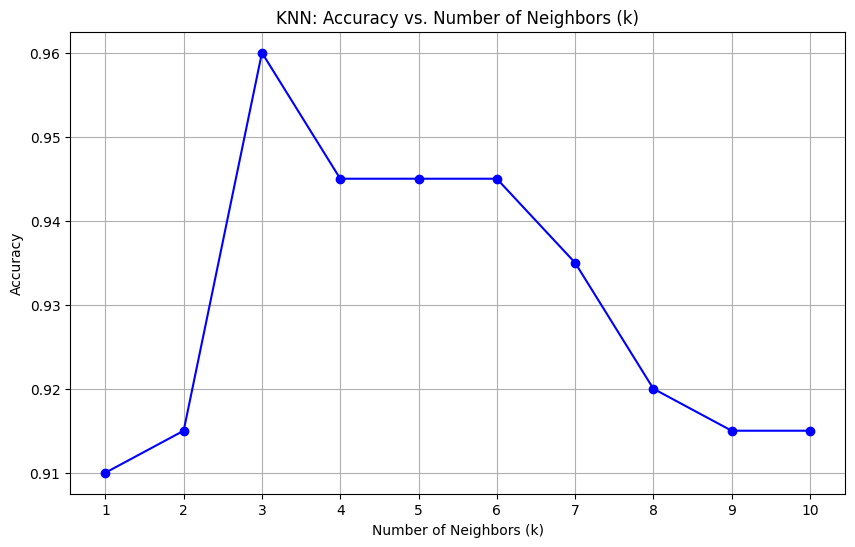

In [14]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title('KNN: Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()